# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached matplotlib-3.8.0-cp311-cp311-win_amd64.whl (7.6 MB)
     -------------------------------------- 284.2/284.2 MB 1.4 MB/s eta 0:00:00
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.9.0-cp311-cp311-win_amd64.whl (2.7 MB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
     -------------------------------------- 938.7/938.7 kB 1.4 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.24.3-cp310-abi3-win_amd64.whl (430 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
     ---------------------------------------- 50.9/50.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): 

  DEPRECATION: wrapt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\wheel.exe' -> 'C:\\Python311\\Scripts\\wheel.exe.deleteme'


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [397]:
# !pip list

In [398]:
import tensorflow as tf
import os

In [399]:
os.path.join("data","happy")

'data\\happy'

In [400]:
os.listdir("data")

['happy', 'sad']

# 2. Remove dodgy images

In [401]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [402]:
data_dir = "data"

In [403]:
image_exts = ["jpeg","jpg","png","bmp"]

In [404]:
img = cv2.imread(os.path.join(data_dir,"happy","_happy_jumping_on_beach-40815.jpg"))

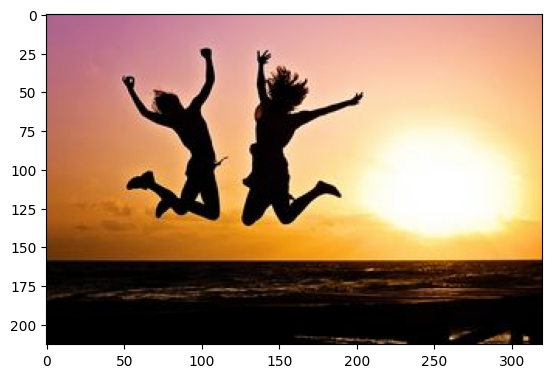

In [405]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [406]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("image not in extension list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("issue with image {}".format(image_path))
            os.remove(image_path)
                

# 3. Load Data

In [407]:
import numpy as np

In [408]:
# tf.keras.utils.image_dataset_from_directory??

In [409]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 472 files belonging to 2 classes.


In [410]:
data_iterator = data.as_numpy_iterator()

In [411]:
batch = data_iterator.next()

In [412]:
batch[0].shape   # batch size, img dim, no of color channels
#rep as numpy array

(32, 256, 256, 3)

In [413]:
# batch consists of 2 thing, images and labels batch[0], batch[1]
batch[1]

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0])

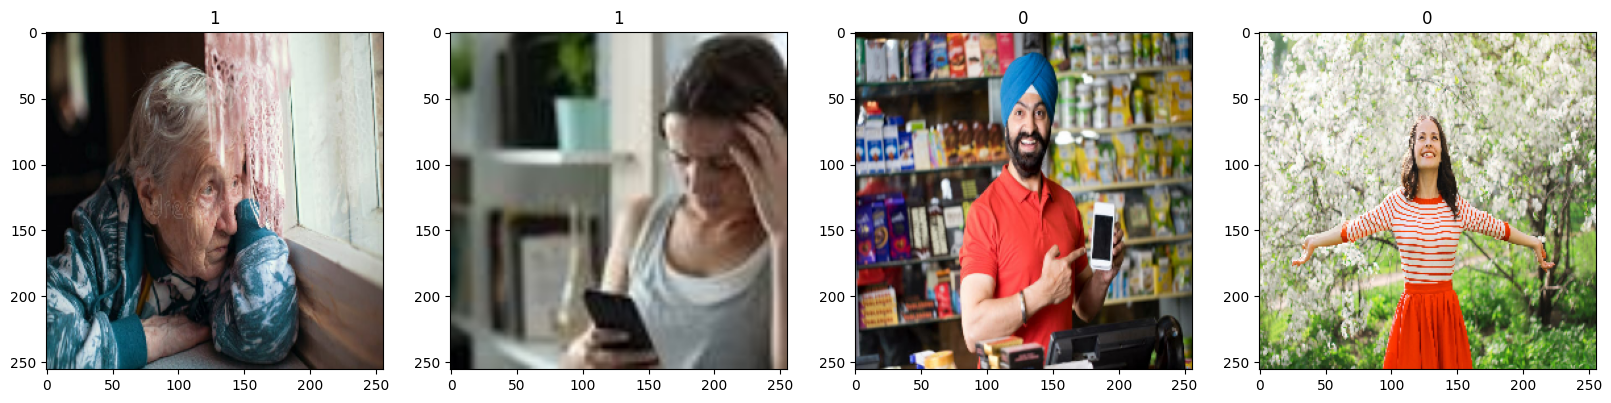

In [414]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [415]:
data = data.map(lambda x,y : (x/255,y)) #converts images from 0-255 to 0-1

In [416]:
scaled_iterator = data.as_numpy_iterator()

In [417]:
scaled_batch = scaled_iterator.next()

In [418]:
scaled_batch[0].max()

1.0

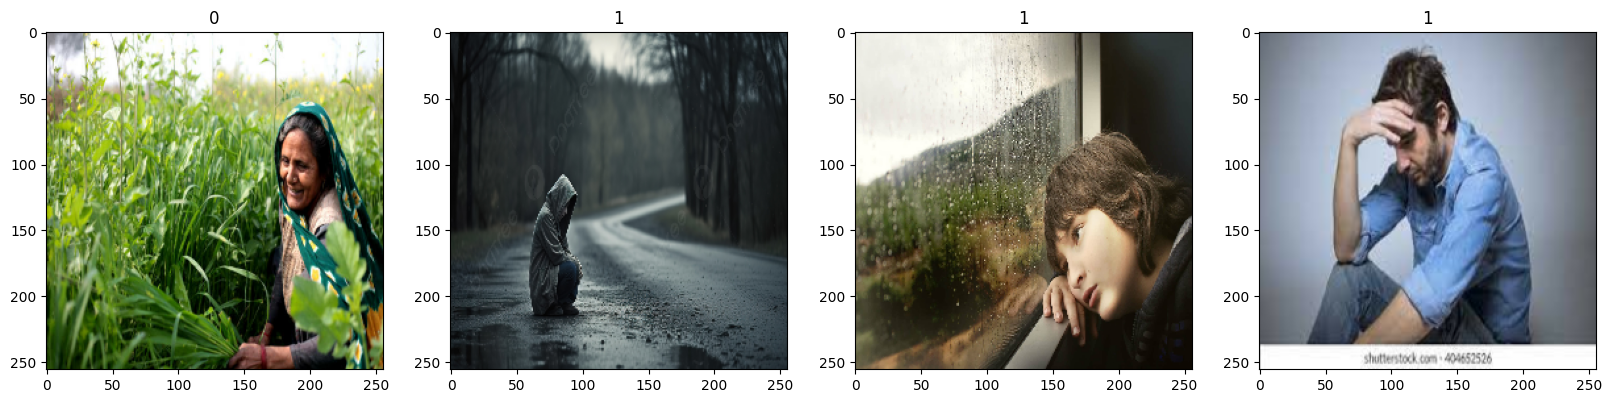

In [419]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[1][idx])

# 5. Split Data

In [420]:
len(data)

15

In [421]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)-train_size-val_size )

In [422]:
test_size + val_size + train_size

15

In [423]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [424]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [425]:
model = Sequential()

In [426]:
model.add(Conv2D(16 ,(3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32 ,(3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16 ,(3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [427]:
model.compile("adam",loss=tf.losses.BinaryCrossentropy(), metrics= ['accuracy'])

In [428]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

# 7. Train

In [429]:
logdir="logs"

In [430]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [431]:
hist = model.fit(train, epochs=20, validation_data= val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 13s 1s/step - loss: 0.8198 - accuracy: 0.5188 - val_loss: 0.6571 - val_accuracy: 0.6250
Epoch 2/20
10/10 [==============================] - 11s 1s/step - loss: 0.6231 - accuracy: 0.6625 - val_loss: 0.5884 - val_accuracy: 0.6771
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: 0.5622 - accuracy: 0.7188 - val_loss: 0.4560 - val_accuracy: 0.8438
Epoch 4/20
10/10 [==============================] - 11s 1s/step - loss: 0.5229 - accuracy: 0.7625 - val_loss: 0.5498 - val_accuracy: 0.6562
Epoch 5/20
10/10 [==============================] - 11s 1s/step - loss: 0.5130 - accuracy: 0.7750 - val_loss: 0.4762 - val_accuracy: 0.7396
Epoch 6/20
10/10 [==============================] - 11s 1s/step - loss: 0.4350 - accuracy: 0.8313 - val_loss: 0.3525 - val_accuracy: 0.8542
Epoch 7/20
10/10 [==============================] - 11s 1s/step - loss: 0.3452 - accuracy: 0.8594 - val_loss: 0.3655 - val_accuracy: 0.8542
Epoch 8/20
10/10 [==

# 8. Plot Performance

In [432]:
hist.history

{'loss': [0.8198164105415344,
  0.6230988502502441,
  0.5621967315673828,
  0.5229215025901794,
  0.5130002498626709,
  0.43504589796066284,
  0.34518125653266907,
  0.3011651933193207,
  0.3124023675918579,
  0.23389527201652527,
  0.15002739429473877,
  0.10422203689813614,
  0.05794211104512215,
  0.038917794823646545,
  0.016797196120023727,
  0.03779525309801102,
  0.036186233162879944,
  0.015636663883924484,
  0.006276823580265045,
  0.0033807288855314255],
 'accuracy': [0.518750011920929,
  0.6625000238418579,
  0.71875,
  0.762499988079071,
  0.7749999761581421,
  0.831250011920929,
  0.859375,
  0.878125011920929,
  0.8968750238418579,
  0.925000011920929,
  0.9593750238418579,
  0.9781249761581421,
  0.9906250238418579,
  0.9937499761581421,
  1.0,
  0.984375,
  0.9937499761581421,
  0.996874988079071,
  1.0,
  1.0],
 'val_loss': [0.6571152806282043,
  0.5884138345718384,
  0.45598316192626953,
  0.549814760684967,
  0.47621846199035645,
  0.35248351097106934,
  0.3655242025

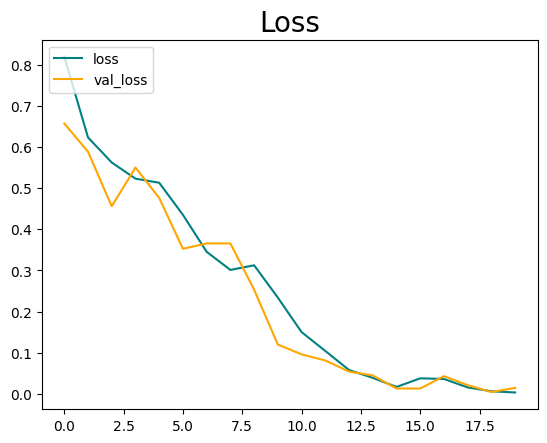

In [433]:
fig = plt.figure()
plt.plot(hist.history['loss'], color="teal", label="loss")
plt.plot(hist.history['val_loss'], color="orange", label="val_loss")
plt.title('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

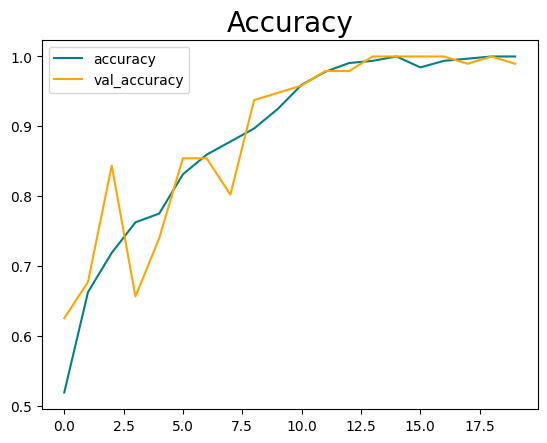

In [434]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color="teal", label="accuracy")
plt.plot(hist.history['val_accuracy'], color="orange", label="val_accuracy")
plt.title('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

# 9. Evaluate

In [435]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [436]:
prec = Precision()
re = Recall()
acc = BinaryAccuracy()


In [437]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    prec.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 497ms/step


In [438]:
print(f'Precision is {prec.result().numpy()}\nRecall is {re.result().numpy()}\nAccuracy is {acc.result().numpy()}')

Precision is 1.0
Recall is 1.0
Accuracy is 1.0


# 10. Test

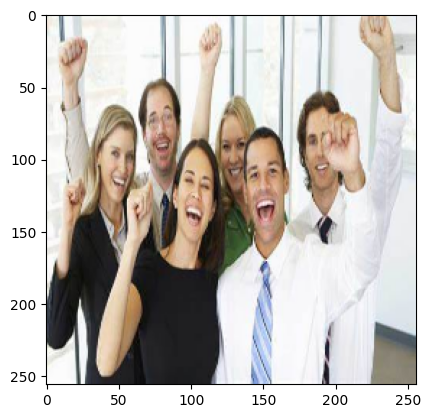

In [466]:
img = cv2.imread(os.path.join("test_imgs","happy3.jpeg"))
resized_img = tf.image.resize(img, (256,256))
plt.imshow(cv2.cvtColor(resized_img.numpy().astype(np.uint8),cv2.COLOR_BGR2RGB))

In [467]:
resized_img
resized_img.shape

TensorShape([256, 256, 3])

In [468]:
np.expand_dims(resized_img,0).shape

(1, 256, 256, 3)

In [469]:
yhat = model.predict(np.expand_dims(resized_img/255,0))

1/1 [==============================] - 0s 88ms/step


In [470]:
yhat

array([[0.35867262]], dtype=float32)

In [471]:
if yhat>0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [473]:
from tensorflow.keras.models import load_model

In [477]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\Users\mahna\Desktop\deep learning\ImageClassification\imageclassification\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
